# Integrating PCA in Pipelines - Lab

## Introduction

In a previous section, you learned about how to use pipelines in scikit-learn to combine several supervised learning algorithms in a manageable pipeline. In this lesson, you will integrate PCA along with classifiers in the pipeline. 

## Objectives

In this lab you will: 

- Integrate PCA in scikit-learn pipelines 

## The Data Science Workflow

You will be following the data science workflow:

1. Initial data inspection, exploratory data analysis, and cleaning
2. Feature engineering and selection
3. Create a baseline model
4. Create a machine learning pipeline and compare results with the baseline model
5. Interpret the model and draw conclusions

##  Initial data inspection, exploratory data analysis, and cleaning

You'll use a dataset created by the Otto group, which was also used in a [Kaggle competition](https://www.kaggle.com/c/otto-group-product-classification-challenge/data). The description of the dataset is as follows:

The Otto Group is one of the world’s biggest e-commerce companies, with subsidiaries in more than 20 countries, including Crate & Barrel (USA), Otto.de (Germany) and 3 Suisses (France). They are selling millions of products worldwide every day, with several thousand products being added to their product line.

A consistent analysis of the performance of their products is crucial. However, due to their global infrastructure, many identical products get classified differently. Therefore, the quality of product analysis depends heavily on the ability to accurately cluster similar products. The better the classification, the more insights the Otto Group can generate about their product range.

In this lab, you'll use a dataset containing:
- A column `id`, which is an anonymous id unique to a product
- 93 columns `feat_1`, `feat_2`, ..., `feat_93`, which are the various features of a product
- a column `target` - the class of a product



The dataset is stored in the `'otto_group.csv'` file. Import this file into a DataFrame called `data`, and then: 

- Check for missing values 
- Check the distribution of columns 
- ... and any other things that come to your mind to explore the data 

In [1]:
# Your code here
import pandas as pd
data = pd.read_csv('otto_group.csv',index_col=0,)
data 

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
4,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,Class_1
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61874,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61875,4,0,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61876,0,0,0,0,0,0,0,3,1,0,...,0,3,1,0,0,0,0,0,0,Class_9


In [2]:
# Your code here-EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61878 entries, 1 to 61878
Data columns (total 94 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   feat_1   61878 non-null  int64 
 1   feat_2   61878 non-null  int64 
 2   feat_3   61878 non-null  int64 
 3   feat_4   61878 non-null  int64 
 4   feat_5   61878 non-null  int64 
 5   feat_6   61878 non-null  int64 
 6   feat_7   61878 non-null  int64 
 7   feat_8   61878 non-null  int64 
 8   feat_9   61878 non-null  int64 
 9   feat_10  61878 non-null  int64 
 10  feat_11  61878 non-null  int64 
 11  feat_12  61878 non-null  int64 
 12  feat_13  61878 non-null  int64 
 13  feat_14  61878 non-null  int64 
 14  feat_15  61878 non-null  int64 
 15  feat_16  61878 non-null  int64 
 16  feat_17  61878 non-null  int64 
 17  feat_18  61878 non-null  int64 
 18  feat_19  61878 non-null  int64 
 19  feat_20  61878 non-null  int64 
 20  feat_21  61878 non-null  int64 
 21  feat_22  61878 non-null  int64 
 22  fea

In [26]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
feat_1     0
feat_2     0
feat_3     0
feat_4     0
feat_5     0
          ..
feat_90    0
feat_91    0
feat_92    0
feat_93    0
target     0
Length: 94, dtype: int64


No data Missing hence the data is ready for usage.

In [3]:
# Your code here- descirbe the data set
data.describe()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,0.263906,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,1.083340,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,30.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [4]:
# Your code here- set the target variable and features
X = data.drop(columns=['target'])
y = data['target']


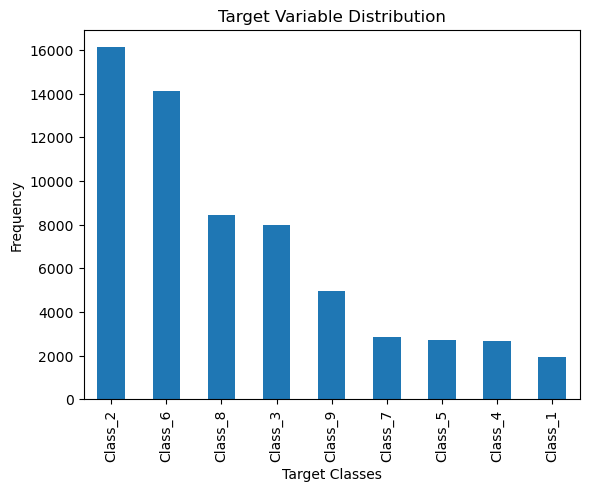

In [5]:
# Your code here -create a histogram of the target variable and print the value counts
import matplotlib.pyplot as plt
y.value_counts().plot(kind='bar')
plt.title('Target Variable Distribution')
plt.xlabel('Target Classes')
plt.ylabel('Frequency')
plt.show()


In [6]:
# Your code here

If you look at all the histograms, you can tell that a lot of the data are zero-inflated, so most of the variables contain mostly zeros and then some higher values here and there. No normality, but for most machine learning techniques this is not an issue. 

In [7]:
# Your code here


Because there are so many zeroes, most values above zero will seem to be outliers. The safe decision for this data is to not delete any outliers and see what happens. With many 0s, sparse data is available and high values may be super informative. Moreover, without having any intuitive meaning for each of the features, we don't know if a value of ~260 is actually an outlier.

In [ ]:
# Your code here-

## Feature engineering and selection with PCA

Have a look at the correlation structure of your features using a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

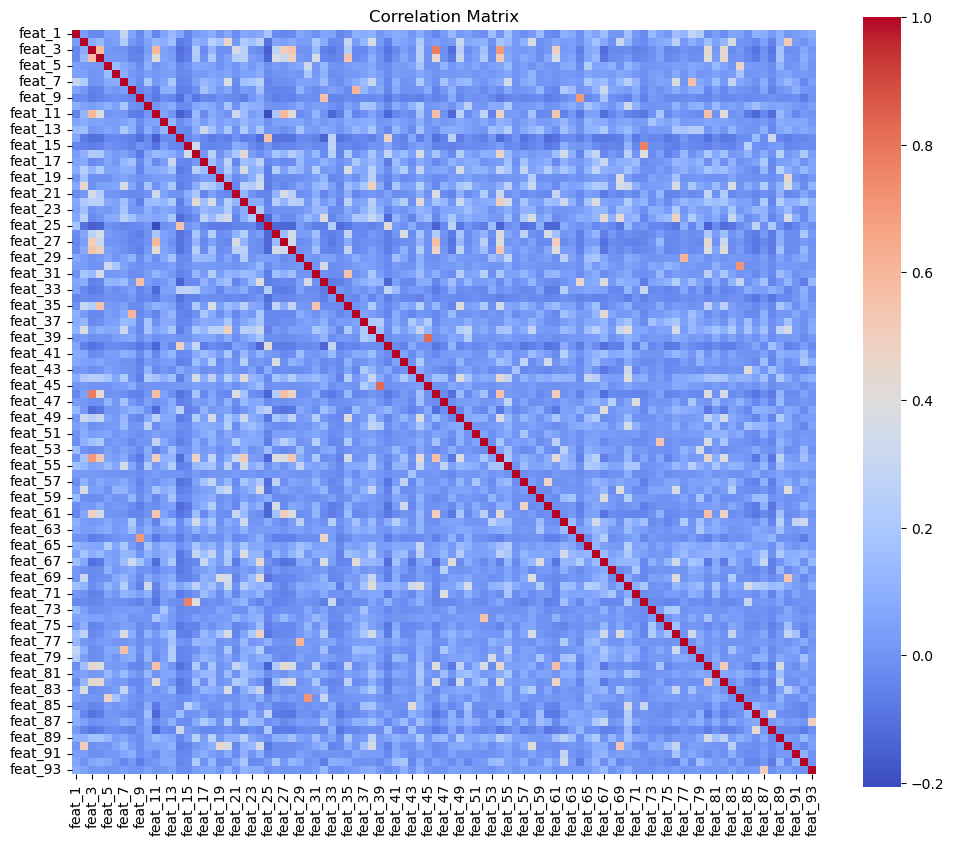

In [27]:
# Your code here-describe the correlation structure of the data
import seaborn as sns
correlation_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()



#


Use PCA to select a number of features in a way that you still keep 80% of your explained variance.

In [29]:
# Your code here-Using PCA to reduce the dimensionality of the data
from sklearn.decomposition import PCA
X = X.select_dtypes(include=[float, int])  # Ensure numeric columns are only used
# Performing PCA keeping 80% of explained variance
from sklearn.decomposition import PCA
pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(X)



In [30]:
# Your code here

print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca.shape[1]}")

Original number of features: 93
Reduced number of features after PCA: 27


## Create a train-test split with a test size of 40%

This is a relatively big training set, so you can assign 40% to the test set. Set the `random_state` to 42. 

In [ ]:
# Your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state=42)




In [13]:
# Your code here

## Create a baseline model

Create your baseline model *in a pipeline setting*. In the pipeline: 

- Your first step will be to scale your features down to the number of features that ensure you keep just 80% of your explained variance (which we saw before)
- Your second step will be to build a basic logistic regression model 

Make sure to fit the model using the training set and test the result by obtaining the accuracy using the test set. Set the `random_state` to 123. 

In [ ]:
# Your code here

# Create a baseline model in a pipeline setting
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=123))
])

# Ensure the features in tne model created keeps the same number of features as the PCA
pipeline.fit(X_train, y_train)


In [33]:
# Your code here-Create a Logistic Regression model and evaluate it

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000, random_state=123)
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=123)

In [16]:
# Your code here

## Create a pipeline consisting of a linear SVM, a simple decision tree, and a simple random forest classifier

Repeat the above, but now create three different pipelines:
- One for a standard linear SVM
- One for a default decision tree
- One for a random forest classifier

In [ ]:
# Your code here
# ⏰ This cell may take several minutes to run

# Create a pipeline having a linear SVM,a simple decision tree and a random forest classifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
# Create pipelines for each model

svm_pipeline = Pipeline
([
    ('classifier', SVC(random_state=123))
])
decision_tree_pipeline = Pipeline
([
    ('classifier', DecisionTreeClassifier(random_state=123))
])
random_forest_pipeline = Pipeline
([
    ('classifier', RandomForestClassifier(random_state=123))
])

## Pipeline with grid search

Construct two pipelines with grid search:
- one for random forests - try to have around 40 different models
- one for the AdaBoost algorithm 

### Random Forest pipeline with grid search

In [44]:
# Your code here 
# imports

# Create two pipelines with grid search-random forest and AdaBoost algorithms
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for Random Forest with 40 different models
rf_param_grid = {
    'classifier__n_estimators': [10, 20, 50, 100],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}
# Create the Random Forest pipeline
rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=123))
])


In [43]:
# Your code here-Create the GridSearchCV object for Random Forest
# ⏰ This cell may take a long time to run!

rf_grid_search = GridSearchCV(rf_pipeline, param_grid=rf_param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the Random Forest grid search
rf_grid_search.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 5, 10, 20],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [10, 20, 50, 100]},
             scoring='accuracy')

Use your grid search object along with `.cv_results` to get the full result overview

In [46]:
# Your code here 

print("Best cross-validation score for Random Forest:")

print(rf_grid_search.best_score_)


Best cross-validation score for Random Forest:
0.7640738147250401


### AdaBoost

In [49]:
# Your code here
# ⏰ This cell may take several minutes to run

ada_param_grid = {
    'classifier__n_estimators': [10, 20, 50, 100],
    'classifier__learning_rate': [0.01, 0.1, 1.0, 10.0]
}

# Create the AdaBoost pipeline
ada_pipeline = Pipeline([
    ('classifier', AdaBoostClassifier(random_state=123))
])
# Create the GridSearchCV object for AdaBoost
ada_grid_search = GridSearchCV(ada_pipeline, param_grid=ada_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
# Fit the AdaBoost grid search
ada_grid_search.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        AdaBoostClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 1.0, 10.0],
                         'classifier__n_estimators': [10, 20, 50, 100]},
             scoring='accuracy')

Use your grid search object along with `.cv_results` to get the full result overview: 

In [48]:
# Your code here 
print("Best cross-validation score for AdaBoost:")

print(ada_grid_search.best_score_)

Best cross-validation score for AdaBoost:
0.6366698387048508


### Level-up (Optional): SVM pipeline with grid search 

As extra level-up work, construct a pipeline with grid search for support vector machines. 
* Make sure your grid isn't too big. You'll see it takes quite a while to fit SVMs with non-linear kernel functions!

In [23]:
# Your code here
# ⏰ This cell may take a very long time to run!

Use your grid search object along with `.cv_results` to get the full result overview: 

In [24]:
# Your code here 

## Note

Note that this solution is only one of many options. The results in the Random Forest and AdaBoost models show that there is a lot of improvement possible by tuning the hyperparameters further, so make sure to explore this yourself!

## Summary 

Great! You've gotten a lot of practice in using PCA in pipelines. What algorithm would you choose and why?